### NAME: SOMTO A.
### ID: 801215537
### HW#: 1
### GITHUB: *https://github.com/Somto-Dera/ECGR5090-Machine-Learning*

In this homework, we will use US Housing dataset. You will develop linear regression with gradient decent algorithm to estimate the price of the house. In this homework, we will use 70% and 30% split between training and evaluation (test) sets across all problems. (Note: You cannot use the built-in function from ML libraries for gradient descent, you must implement it yourself. However, you can use built-in function for normalization/standardization)

#### Problem 2
A) 
 Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

##### Steps/ Algorithm/ Pseudo
* import necessary library
* load data set
* create a normalization and standardisation function from scratch
* create a cost function from scratch
* create gradient descent function with penalty from scratch
* do some minor data preprocessing and analysis
* split data set into test and train
* call gradient descent function to get values for theta and cost history in relation to the explanatory variables
* plot a convergence of gradient descent graph with cost history.
* plot a graph showing the effect of changing the learning rate in convergence of the gradient descent with cost history.
* test result with test data set.
* plot graph comparing validation and train losses

##### import the necessary libraries
* *numpy* is used for array and matrics manipulation.
<br>
* *pandas* is used for data manipulation and analysis.
<br>
* *matplotlib* is used for data visualisation
<br>
*  *sklearn.model_selection* is used to split data sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Normalizes the features(input variables) in X.

##### Parameters
* X : n dimensional array (matrix), shape (n_samples, n_features). Features(input varibale) to be normalized.

##### Returns
* X_norm : n dimensional array (matrix), shape (n_samples,n_features). A normalized version of X.

In [2]:
def feature_normalize(X):
    
    X_norm = (X - np.min(X))/(np.max(X) - np.min(X))
    
    return X_norm

Standardizes the features(input variables) in X.

##### Parameters
* X : n dimensional array (matrix), shape (n_samples, n_features). Features(input varibale) to be standardized.

##### Returns
* X_standard : n dimensional array (matrix), shape (n_samples,n_features). A normalized version of X.
* mu : n dimensional array (matrix), shape (n_features,). The mean value.
* sigma : n dimensional array (matrix), shape (n_features,). The standard deviation.

In [3]:
def feature_standardize(X):
    
    #Note here we need mean of indivdual column here, hence axis = 0
    mu = np.mean(X, axis = 0)
    # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
    sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
    X_standard = (X - mu)/sigma
    return X_standard, mu, sigma

#### create a cost function
* The hypotheis function is h(θ,x)= θ_0 + θ_1 * x_1

* Matrix operations are much faster than loops operations, so matrice of x, θ and (x * θ) were used

In [4]:
def compute_cost(X, y, theta):
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    #J = 1 / (2 * m) * np.sum(sqrErrors)
    J = 1 / (2 * m) * errors.T.dot(errors)
    
    return J

#### create gradient-cost function for linear regression.

<br>**Input Parameters**
<br> *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
<br> *'m' :* number of training examples
<br> *'n' :* number of features (including X_0 column of ones)
<br> *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
<br> *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)
<br><br>**Output Parameters**
<br> *'J' :* Scalar value.
<br><br>**Library Functions Used**
<br> *numpy.dot()* returns the product of two arrays.
<br> *numpy.subtract()* performs vector entree subtraction
<br> *numpy.square()* performs the vector entree square

In [5]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

##### load dataset housing.csv into variable 'dataset
* This dataset was provided by this HW. It contains 13 columns, the 11 columns are explanatory variables x1, ..., x10; and the final/fourth column is the dependent variable y. It has 545 data per column.

In [6]:
housing = pd.read_csv('Housing.csv')
housing.head() # To get first n rows from the dataset default value of n is 5

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### minor data data processing and analysis

In [7]:
dataset = housing
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
dataset.shape
dataset.describe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### Drop columns not used for the training from the dataset set

In [9]:
dataset = dataset.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], axis='columns')
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


#### Split dataset into test(0.3) and train(0.7)

In [10]:
np.random.seed(0)
datasetOneA_train, datasetOneA_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 1)
datasetOneA_train.shape

(381, 6)

In [11]:
datasetOneA_test.shape

(164, 6)

In [12]:
x = datasetOneA_train.values[:, 1:6]  # get input values from first column
y = datasetOneA_train.values[:, 0]  # get output values from second column
m = len(y) # Number of training examples
temp_m = len(x)
assert (m == temp_m)

Text(0.5, 1.0, 'SCATTER PLOT OF TRAINING DATA')

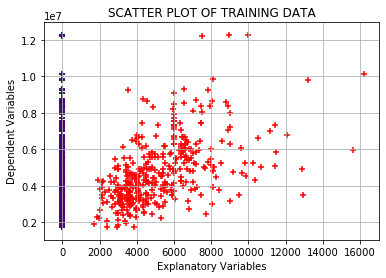

In [13]:
plt.scatter(datasetOneA_train.values[:, 1],y, color='red',marker= '+')
plt.scatter(datasetOneA_train.values[:, 2],y, color='yellow',marker= '+')
plt.scatter(datasetOneA_train.values[:, 3],y, color='blue',marker= '+')
plt.scatter(datasetOneA_train.values[:, 4],y, color='green',marker= '+')
plt.scatter(datasetOneA_train.values[:, 5],y, color='indigo',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TRAINING DATA')

#### normalize, standardize features and call the cost function
* The hypotheis function is h(θ,x)= θ_0 + θ_1 * x_1
* Matrix operations are much faster than loops operations, so matrice of x, θ and (x * θ) were used

In [14]:
x = feature_normalize(x)
print('X_norm= ', x[:5])

x, mu, sigma = feature_standardize(x)
print('X_stand= ', x[:5])

X_norm=  [[2.77777778e-01 2.46913580e-04 1.23456790e-04 6.17283951e-05
  1.23456790e-04]
 [2.18518519e-01 1.23456790e-04 6.17283951e-05 6.17283951e-05
  0.00000000e+00]
 [4.44444444e-01 1.85185185e-04 1.23456790e-04 6.17283951e-05
  1.85185185e-04]
 [1.92592593e-01 1.85185185e-04 6.17283951e-05 1.23456790e-04
  0.00000000e+00]
 [2.46913580e-01 1.85185185e-04 1.23456790e-04 1.23456790e-04
  6.17283951e-05]]
X_stand=  [[-0.32640558  1.32167636  1.39689225 -0.92698554  1.51846971]
 [-0.75373534 -1.30102517 -0.5816057  -0.92698554 -0.79567813]
 [ 0.87545936  0.0103256   1.39689225 -0.92698554  2.67554362]
 [-0.94069211  0.0103256  -0.5816057   0.25422346 -0.79567813]
 [-0.54897316  0.0103256   1.39689225  0.25422346  0.36139579]]


In [15]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
X = np.hstack((np.ones((m,1)), x))

#Initialise theta to zero as recommended by the hw question
theta = np.zeros(6)

# declare and assign values to the gradient descent learning parameters alpha and no of iterations
iterations =1000;
alpha = 0.04;

#### compute cost

In [16]:
trainTheta, trainCostHistory = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of train theta =', trainTheta)
print('First 5 values from train cost_history =', trainCostHistory[:5])
print('Last 5 values from train cost_history =', trainCostHistory[-5 :])

Final value of train theta = [4775201.94225721  703518.35649321   53022.08263576  594731.7381038
  471093.35463824  333995.16619082]
First 5 values from train cost_history = [1.20045724e+13 1.10740737e+13 1.02232190e+13 9.44477138e+12
 8.73220765e+12]
Last 5 values from train cost_history = [6.99422826e+11 6.99422826e+11 6.99422826e+11 6.99422826e+11
 6.99422826e+11]


Text(0.5, 1.0, 'Convergence of gradient descent of train')

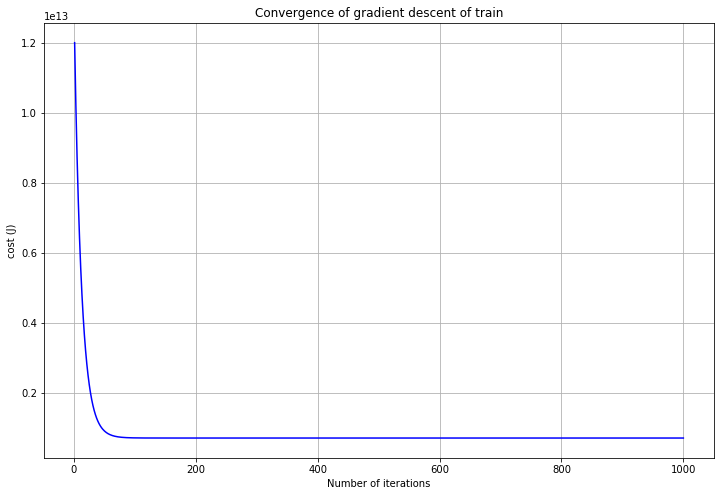

In [17]:
plt.plot(range(1, iterations +1), trainCostHistory, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent of train")

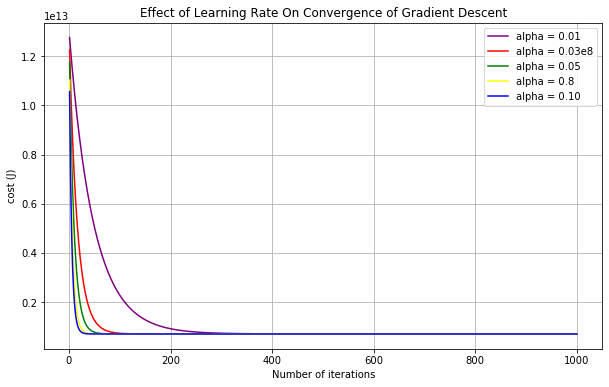

In [18]:
theta = np.zeros(6)

alpha = 0.01;
trainTheta_1, trainCostHistory_1 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.03;
trainTheta_2, trainCostHistory_2 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.05;
trainTheta_3, trainCostHistory_3 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.08;
trainTheta_4, trainCostHistory_4 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.10;
trainTheta_5, trainCostHistory_5 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), trainCostHistory_1, color ='purple', label = 'alpha = 0.01')
plt.plot(range(1, iterations +1), trainCostHistory_2, color ='red', label = 'alpha = 0.03e8')
plt.plot(range(1, iterations +1), trainCostHistory_3, color ='green', label = 'alpha = 0.05')
plt.plot(range(1, iterations +1), trainCostHistory_4, color ='yellow', label = 'alpha = 0.8')
plt.plot(range(1, iterations +1), trainCostHistory_5, color ='blue', label = 'alpha = 0.10')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()


#### test linear model

In [19]:
xTest = datasetOneA_test.values[:, 1:6]  # get input values from first column
yTest = datasetOneA_test.values[:, 0]  # get output values from second column
m = len(yTest) # Number of training examples
temp_m = len(xTest)
assert (m == temp_m)

Text(0.5, 1.0, 'SCATTER PLOT OF TRAINING DATA')

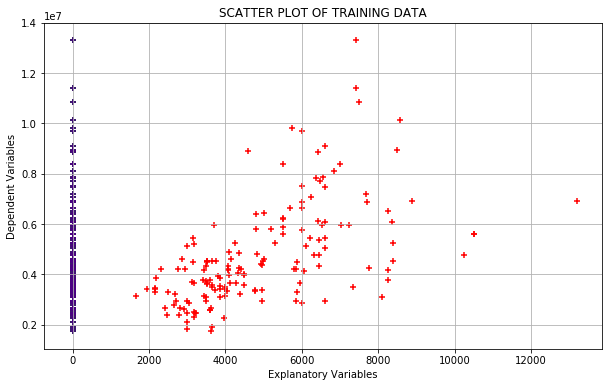

In [20]:
plt.scatter(datasetOneA_test.values[:, 1],yTest, color='red',marker= '+')
plt.scatter(datasetOneA_test.values[:, 2],yTest, color='yellow',marker= '+')
plt.scatter(datasetOneA_test.values[:, 3],yTest, color='blue',marker= '+')
plt.scatter(datasetOneA_test.values[:, 4],yTest, color='green',marker= '+')
plt.scatter(datasetOneA_test.values[:, 5],yTest, color='indigo',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TRAINING DATA')

In [21]:
xTest = feature_normalize(xTest)
print('X_norm= ', xTest[:5])

xTest, mu, sigma = feature_standardize(xTest)
print('X_norm= ', xTest[:5])

X_norm=  [[4.72727273e-01 3.03030303e-04 1.51515152e-04 1.51515152e-04
  7.57575758e-05]
 [6.36363636e-01 3.03030303e-04 7.57575758e-05 3.03030303e-04
  2.27272727e-04]
 [7.95454545e-01 3.03030303e-04 1.51515152e-04 1.51515152e-04
  7.57575758e-05]
 [4.86363636e-01 2.27272727e-04 7.57575758e-05 2.27272727e-04
  0.00000000e+00]
 [5.01136364e-01 2.27272727e-04 7.57575758e-05 1.51515152e-04
  0.00000000e+00]]
X_norm=  [[ 0.64908286  1.62413499  1.47348095  0.15992423  0.34118416]
 [ 1.74299277  1.62413499 -0.54027635  2.34555539  2.67260924]
 [ 2.80651629  1.62413499  1.47348095  0.15992423  0.34118416]
 [ 0.74024202  0.14436755 -0.54027635  1.25273981 -0.82452838]
 [ 0.83899777  0.14436755 -0.54027635  0.15992423 -0.82452838]]


In [22]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
X_Test = np.hstack((np.ones((m,1)), xTest))

#Initialise theta to train theta as recommended by the hw question
evalTheta = trainTheta
evalTheta

array([4775201.94225721,  703518.35649321,   53022.08263576,
        594731.7381038 ,  471093.35463824,  333995.16619082])

In [23]:
testTheta, testCostHistory = gradient_descent(X_Test, yTest, evalTheta, alpha, iterations)
print('Final value of test theta =', testTheta)
print('First 5 values from test cost_history =', testCostHistory[:5])
print('Last 5 values from test cost_history =', testCostHistory[-5 :])

Final value of test theta = [4747045.73170732  771898.356627    321858.67362612  526457.23461067
  430869.9492029   303822.06374742]
First 5 values from test cost_history = [9.12747594e+11 9.07958816e+11 9.04287226e+11 9.01413248e+11
 8.99119538e+11]
Last 5 values from test cost_history = [8.85968719e+11 8.85968719e+11 8.85968719e+11 8.85968719e+11
 8.85968719e+11]


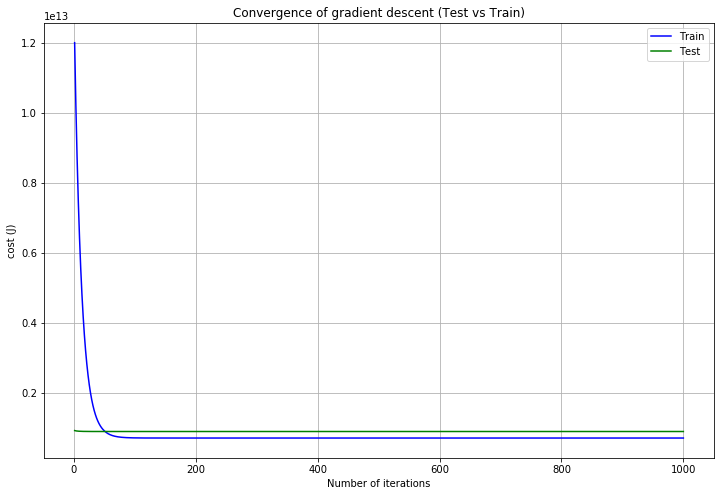

In [24]:
plt.plot(range(1, iterations +1), trainCostHistory, color ='blue', label = 'Train')
plt.plot(range(1, iterations +1), testCostHistory, color ='green', label = 'Test')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent (Test vs Train)")
plt.legend()